# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

#### Answer 
This study considers real data collected from a Portuguese retail bank, from May 2008 to June 2013, in a total of 52,944 phone contacts. The dataset is unbalanced, as only 6557 (12.38%) records are related with successes.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.query('duration == 0')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
6251,39,admin.,married,high.school,no,yes,no,telephone,may,tue,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
23031,59,management,married,university.degree,no,yes,no,cellular,aug,tue,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
28063,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,fri,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
33015,31,blue-collar,married,basic.9y,no,no,no,cellular,may,mon,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.299,5099.1,no


### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Objective

> The goal of this pratical application is develop a model to predict if hte client is likely to subscribe to a term deposit. I will be testing different bynary classifier models to obtain the model with the lowest error in both training and testing dataset

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [6]:
X = df.iloc[:, 0:7]
y = df.iloc[:, -1:]

X = pd.get_dummies(X.iloc[:,1:7])
X['age'] = df['age']
X.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,age
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,56
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,57
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,37
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,40
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,56


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32950 entries, 12556 to 15795
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   job_admin.                     32950 non-null  uint8
 1   job_blue-collar                32950 non-null  uint8
 2   job_entrepreneur               32950 non-null  uint8
 3   job_housemaid                  32950 non-null  uint8
 4   job_management                 32950 non-null  uint8
 5   job_retired                    32950 non-null  uint8
 6   job_self-employed              32950 non-null  uint8
 7   job_services                   32950 non-null  uint8
 8   job_student                    32950 non-null  uint8
 9   job_technician                 32950 non-null  uint8
 10  job_unemployed                 32950 non-null  uint8
 11  job_unknown                    32950 non-null  uint8
 12  marital_divorced               32950 non-null  uint8
 13  marital_marr

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [9]:
from time import time
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [10]:
svc_model = svm.SVC()

start = time()
svc_model.fit(X_train, y_train)
stop = time()
svc_model_time = stop - start

print(f"Training time: {stop - start}s")
print(f'svc_model score on training data: {svc_model.score(X_train, y_train)}')
print(f'svc_model score on testing data: {svc_model.score(X_test, y_test)}')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 13.376094818115234s
svc_model score on training data: 0.887556904400607
svc_model score on testing data: 0.8865015780529255


In [11]:
knn_model = KNeighborsClassifier()

start = time()
knn_model.fit(X_train, y_train)
stop = time()
knn_model_time = stop - start

print(f"Training time: {stop - start}s")
print(f'knn_model score on training data: {knn_model.score(X_train, y_train)}')
print(f'knn_model score on testing data: {knn_model.score(X_test, y_test)}')

Training time: 0.03055095672607422s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


knn_model score on training data: 0.8907435508345979
knn_model score on testing data: 0.8746054867686331


In [12]:
tree_model = DecisionTreeClassifier()

start = time()
tree_model.fit(X_train, y_train)
stop = time()
tree_model_time = stop - start
print(f"Training time: {stop - start}s")
print(f'tree_model score on training data: {tree_model.score(X_train, y_train)}')
print(f'tree_model score on testing data: {tree_model.score(X_test, y_test)}')

Training time: 0.12233901023864746s
tree_model score on training data: 0.9166009104704097
tree_model score on testing data: 0.8613741199320223


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
start = time()
logreg.fit(X_train, y_train)
stop = time()
logreg_time = stop - start
print(f"Training time: {logreg_time}s")
print(f'model score on training data: {logreg.score(X_train, y_train)}')
print(f'model score on testing data: {logreg.score(X_test, y_test)}')


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 0.3144712448120117s
model score on training data: 0.887556904400607
model score on testing data: 0.8865015780529255


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

> The accuracy of the Logistic Regression model was 0.89 for the training and test set

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [14]:
import numpy as np
data = {'Model': ['Logistic Regression', 'KNN algorithm', 'Decision Tree', 'SVM Model'],
        'Train Time (s)': [logreg_time, knn_model_time, tree_model_time, svc_model_time],
        'Train Accuracy': [logreg.score(X_train, y_train), knn_model.score(X_train, y_train), tree_model.score(X_train, y_train), svc_model.score(X_train, y_train)],
        'Test Accuracy': [logreg.score(X_test, y_test), knn_model.score(X_test, y_test), tree_model.score(X_test, y_test), svc_model.score(X_test, y_test)]}

df_models = np.round(pd.DataFrame(data), decimals = 4)
df_models

,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.3145,0.8876,0.8865
1,KNN algorithm,0.0306,0.8907,0.8746
2,Decision Tree,0.1223,0.9166,0.8614
3,SVM Model,13.3761,0.8876,0.8865


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

### Answer
- To answer the following questions the Logistic Regression model was select since it has obtained the highest test accuracy. Altough Decision Tree model had higher train accuracy, it seems that can cause overfitting. I will focus in optmizing the hyperparamenters of the logistic regression. 

- The first thing that I will explore the the feature importances for the model.

In [15]:
model = LogisticRegression()

model.fit(X_train, y_train)

fi = pd.DataFrame(model.coef_[0], index = [X_train.columns], columns=['coefficient'])
fi.sort_values(by='coefficient', ascending=False)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,coefficient
job_student,1.060844
job_retired,0.592014
job_unemployed,0.133168
education_illiterate,0.041097
education_university.degree,0.025637
age,0.013654
default_yes,-0.009297
education_unknown,-0.028544
marital_unknown,-0.036650
default_no,-0.054559


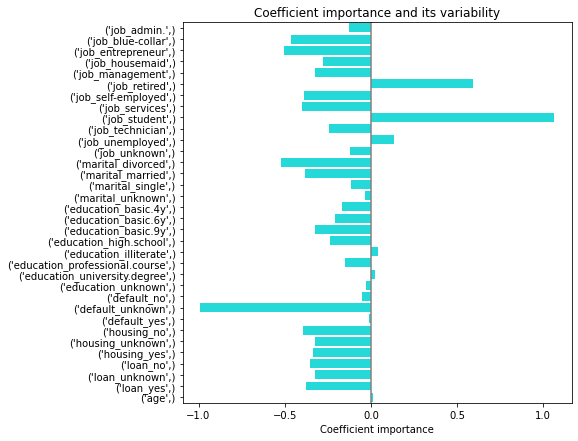

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


#Plot Feature importance
plt.figure(figsize=(9, 7))
sns.barplot(data=fi.transpose(), orient='h', color='cyan', saturation=0.7)
plt.axvline(x=0, color='.5')
plt.xlabel('Coefficient importance')
plt.title('Coefficient importance and its variability')
plt.subplots_adjust(left=.3)

In [17]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define dataset
X, y = X_train, y_train

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y.values.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best: 0.887557 using {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887527 (0.000168) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887557 (0.000152) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887527 (0.000168) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.887527 (0.000168) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887557 (0.000152) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887527 (0.000168) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.887557 (0.000152) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887557 (0.000152) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887557 (0.000152) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.887557 (0.000152) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.887557 (0.000152) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.887557 (0.000152) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.887557 (0.000152) with: {

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#Best Model C: 100, penalty: l2, solver: lbfgs

In [19]:
o_logreg = LogisticRegression(C=100, penalty='l2', solver='lbfgs')
start = time()
o_logreg.fit(X_train, y_train)
stop = time()
o_logreg_time = stop - start
print(f"Training time: {o_logreg_time}s")
print(f'model score on training data: {o_logreg.score(X_train, y_train)}')
print(f'model score on testing data: {o_logreg.score(X_test, y_test)}')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training time: 0.31765103340148926s
model score on training data: 0.887556904400607
model score on testing data: 0.8865015780529255


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
df_models = np.round(df_models.append({'Model':'Logistic Regression (Optimized)', 
                                       'Train Time (s)':o_logreg_time, 
                                       'Train Accuracy':o_logreg.score(X_train, y_train),
                                       'Test Accuracy': o_logreg.score(X_test, y_test)}, 
                                      ignore_index=True), decimals = 4)
df_models

/var/folders/rr/ffp1c_lx2xvc_cg2t0j672740000gn/T/ipykernel_14922/652776978.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = np.round(df_models.append({'Model':'Logistic Regression (Optimized)',


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.3145,0.8876,0.8865
1,KNN algorithm,0.0306,0.8907,0.8746
2,Decision Tree,0.1223,0.9166,0.8614
3,SVM Model,13.3761,0.8876,0.8865
4,Logistic Regression (Optimized),0.3177,0.8876,0.8865


In [21]:
# TRying to see if the optimization of the hyperparameter can reduce the overfiting of the decision tree model

In [22]:
dt = DecisionTreeClassifier(random_state=42)

In [23]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [24]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [25]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 544 ms, sys: 197 ms, total: 741 ms
Wall time: 2.39 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

##### Questions

In [26]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
32,0.075319,0.001654,0.021818,0.001843,entropy,3,20,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887594,0.886744,0.888430,0.887459,0.887557,0.000599,1
7,0.060714,0.003518,0.018759,0.001632,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.887594,0.886744,0.888430,0.887459,0.887557,0.000599,1
0,0.071658,0.001778,0.024610,0.001617,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.887594,0.887473,0.887580,0.887580,0.887557,0.000049,3
25,0.068959,0.003442,0.024928,0.001819,entropy,2,5,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.887594,0.887473,0.887580,0.887580,0.887557,0.000049,3
30,0.071407,0.001766,0.023318,0.000879,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.887594,0.887473,0.887338,0.887580,0.887496,0.000103,5


In [27]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

In [28]:
o_tree_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=20, random_state=42)

start = time()
o_tree_model.fit(X_train, y_train)
stop = time()
o_tree_model_time = stop - start
print(f"Training time: {stop - start}s")
print(f'tree_model score on training data: {o_tree_model.score(X_train, y_train)}')
print(f'tree_model score on testing data: {o_tree_model.score(X_test, y_test)}')

Training time: 0.06921982765197754s
tree_model score on training data: 0.8880121396054628
tree_model score on testing data: 0.887229910172372


In [29]:
df_models = np.round(df_models.append({'Model':'Decision Tree (Optimized)', 'Train Time (s)':o_tree_model_time, 'Train Accuracy':o_tree_model.score(X_train, y_train),'Test Accuracy': o_tree_model.score(X_test, y_test)}, ignore_index=True), decimals = 4)
df_models

/var/folders/rr/ffp1c_lx2xvc_cg2t0j672740000gn/T/ipykernel_14922/3290005906.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = np.round(df_models.append({'Model':'Decision Tree (Optimized)', 'Train Time (s)':o_tree_model_time, 'Train Accuracy':o_tree_model.score(X_train, y_train),'Test Accuracy': o_tree_model.score(X_test, y_test)}, ignore_index=True), decimals = 4)


,Model,Train Time (s),Train Accuracy,Test Accuracy
0,Logistic Regression,0.3145,0.8876,0.8865
1,KNN algorithm,0.0306,0.8907,0.8746
2,Decision Tree,0.1223,0.9166,0.8614
3,SVM Model,13.3761,0.8876,0.8865
4,Logistic Regression (Optimized),0.3177,0.8876,0.8865
5,Decision Tree (Optimized),0.0692,0.8880,0.8872


In [31]:
#> The optimized decision tree shows better train and test accuracy than the optimized Logistic Regression

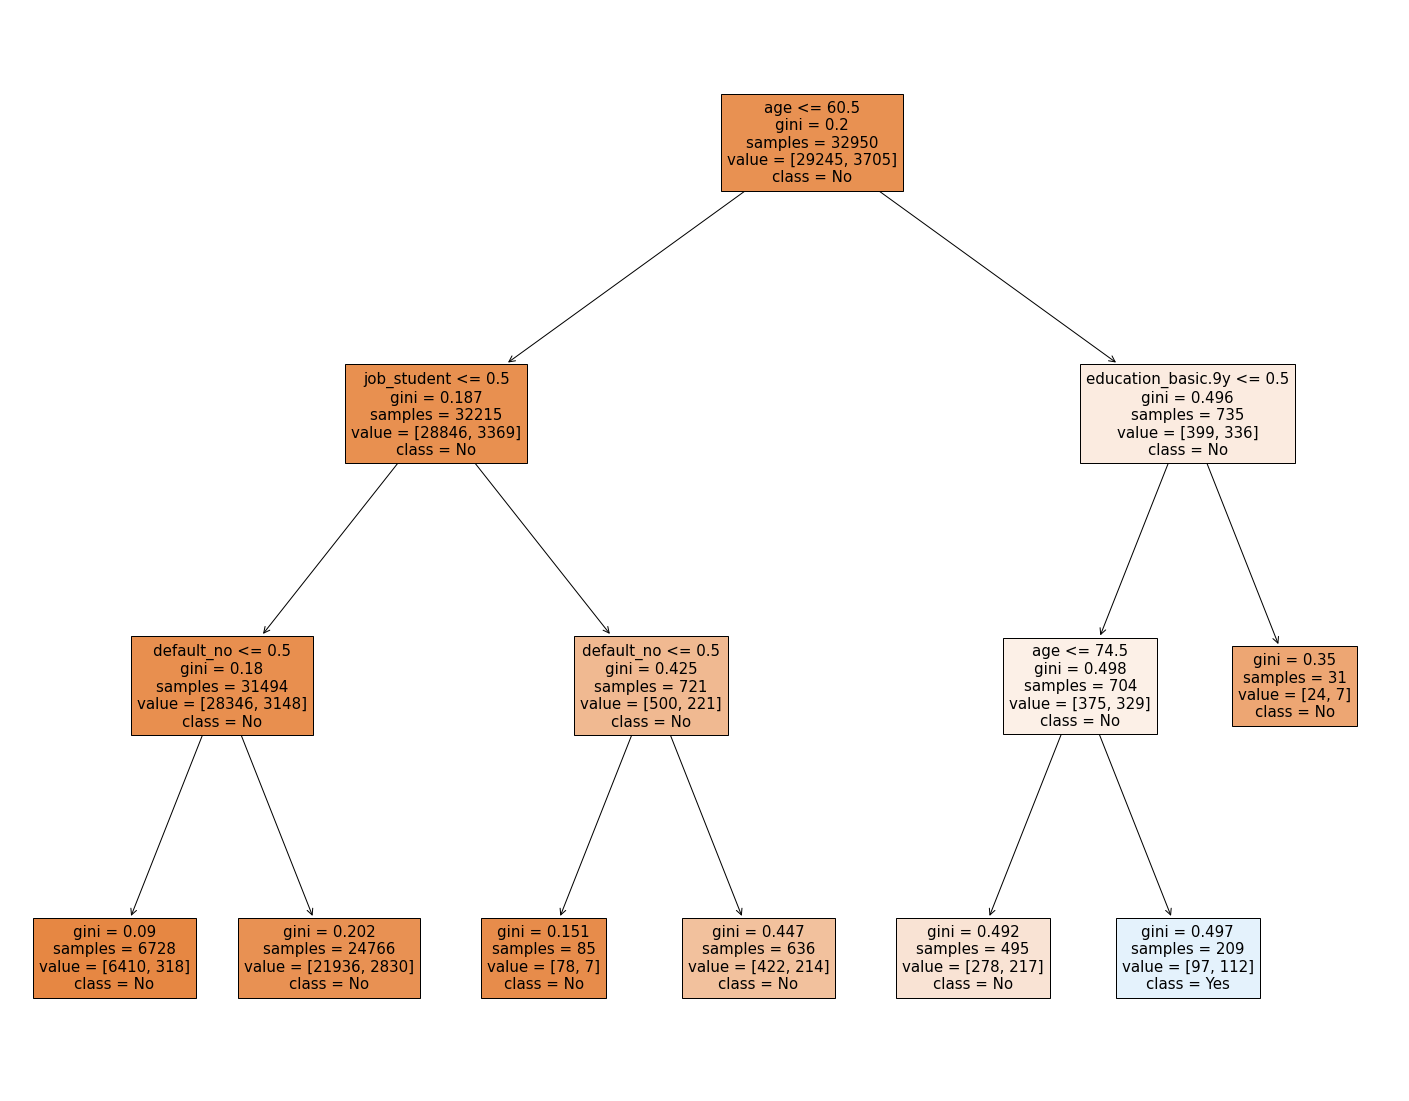

In [64]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(o_tree_model,
                   feature_names=X.columns,
                   class_names=['No','Yes'],
                   filled=True)

In [59]:
fi = pd.DataFrame(o_tree_model.feature_importances_, index = [X_train.columns], columns=['feature importance'])
fi.sort_values(by='feature importance', ascending=False)

,feature importance
age,0.600309
job_student,0.199012
default_no,0.189218
education_basic.9y,0.011461
loan_yes,0.000000
loan_unknown,0.000000
loan_no,0.000000
housing_yes,0.000000
housing_unknown,0.000000
housing_no,0.000000


In [60]:
fig.savefig('decisiontree.jpg', figsize=(15, 10))

/var/folders/rr/ffp1c_lx2xvc_cg2t0j672740000gn/T/ipykernel_14922/1062474595.py:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "figsize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('decisiontree.jpg', figsize=(15, 10))
